# Generador y clasificador de dígitos. Naive Bayes.

In [36]:
#librerias necesarias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import random
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Datos utilizados
En el contexto de este estudio, se optará por hacer uso de la base de datos rawdata, la cual es extraída de la librería scikit-learn (sklearn). Esta base de datos rawdata, con frecuencia utilizada en tareas relacionadas con la visión por computadora, presenta una estructura que se compone de una tabla que alberga los píxeles o variables asociadas a las imágenes. Acompañando esta información visual, se encuentra un vector que identifica las clases o categorías a las que pertenecen estas imágenes. En esencia, la base de datos rawdata se caracteriza por proporcionar de manera separada las variables que representan la composición visual de las imágenes y el vector que señala la clasificación específica asignada a cada una. Este enfoque modular facilita significativamente el procesamiento y análisis de la información al desglosar de manera clara las características visuales de las imágenes de las etiquetas que las categorizan.

In [57]:
raw_data = fetch_openml('mnist_784') 
raw_data.data 

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

In [4]:
try:
    rawdata.data.astype('int').astype(int)
    is_integer = True
except ValueError:
    is_integer = False

if is_integer:
    print("rawdata contiene valores enteros ")
else:
    print("rawdata contiene valores enteros ")

El dataframe o tabla mnist contiene solo números enteros.


In [5]:
rawdata.data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


## EDA of the data

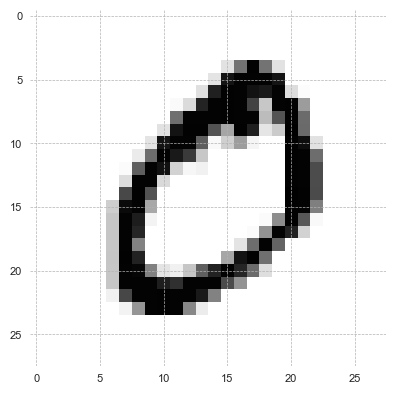

In [55]:
#Observación del número cero.
plt.style.use('_classic_test_patch')
plt.imshow(np.reshape(np.array(rawdata.data.loc[1]), (28, 28)))
plt.show()

In [60]:
raw_data.data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Gráficos de las variables numéricas

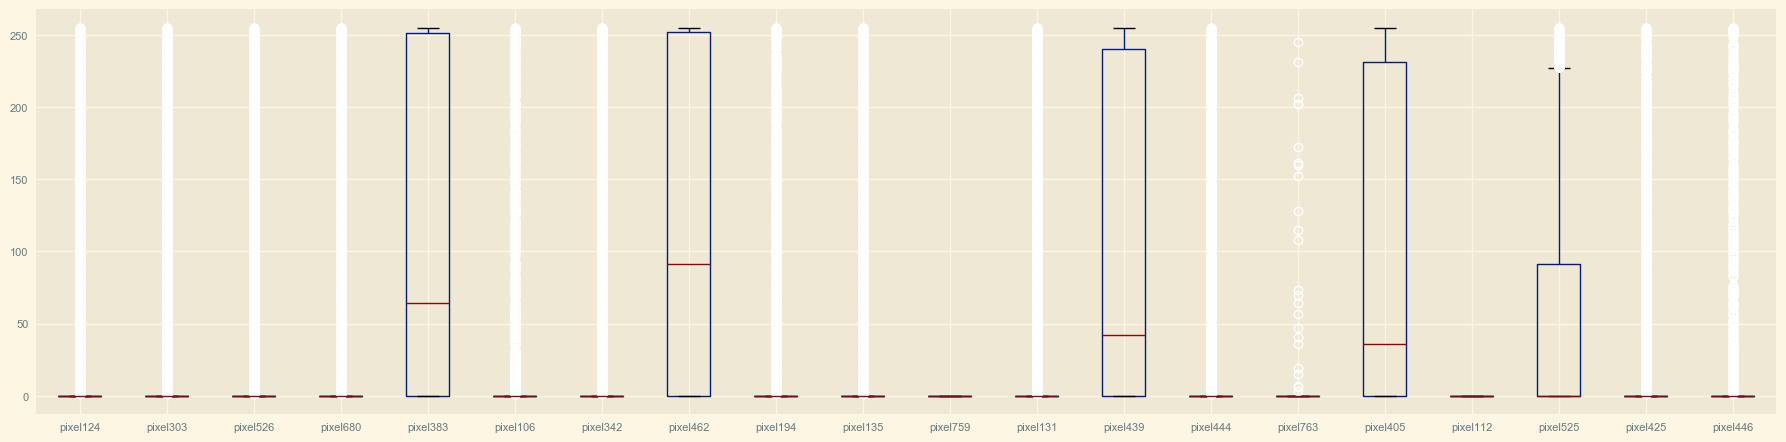

In [65]:
#Box-plot

plt.style.use('seaborn-dark-palette')
raw_data.data.iloc[:,lista_columnas].boxplot(figsize=(20,5))
plt.show()

### Manejo del desbalanceo de los datos

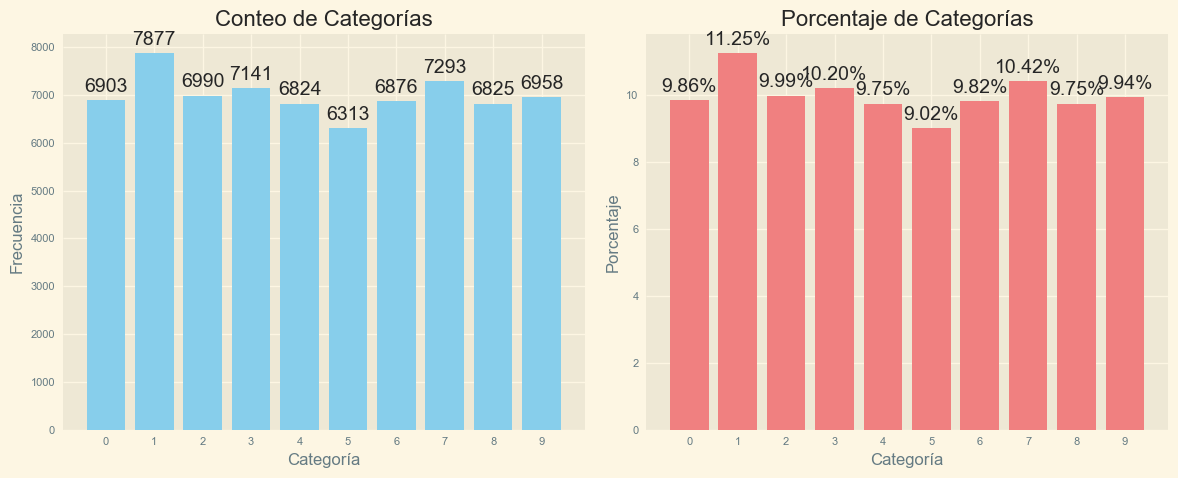

In [66]:
plt.style.use('seaborn-dark-palette')
conteo_categorias = raw_data.target.value_counts().sort_index()
porcentajes = (conteo_categorias / len(raw_data.target)) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) 

bars1 = axes[0].bar(conteo_categorias.index, conteo_categorias, color='skyblue')
axes[0].set_title('Conteo de Categorías')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Frecuencia')


for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom')


bars2 = axes[1].bar(porcentajes.index, porcentajes, color='lightcoral')
axes[1].set_title('Porcentaje de Categorías')
axes[1].set_xlabel('Categoría')
axes[1].set_ylabel('Porcentaje')

for bar in bars2:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

In [18]:
df_raw_data = pd.concat([rawdata.data, rawdata.target], axis = 1)
df_raw_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


En el proceso de preprocesamiento de datos, se implementa una estrategia efectiva para abordar el desequilibrio entre las clases: el subsampling. Este método se encarga de ajustar la proporción de datos de cada clase mediante un muestreo cuidadosamente diseñado. En este contexto específico, el objetivo es equiparar la cantidad de datos en cada categoría al número mínimo de instancias presentes en la clase minoritaria, que en este caso corresponde al número 5.

En términos más detallados, el subsampling implica la selección y retención de una cantidad específica de instancias de cada clase, de manera que se alcance un equilibrio proporcional en todo el conjunto de datos. Al igualar el número de datos de cada categoría al mínimo representado por la clase minoritaria (la asociada al número 5), se busca mitigar los efectos negativos del desbalance en el rendimiento del modelo.

Este enfoque estratégico no solo contribuye a corregir las disparidades en las frecuencias de las clases, sino que también desempeña un papel fundamental en la mejora de la robustez y eficacia del modelo. Al proporcionar una representación más equitativa de las diversas categorías, el subsampling facilita un aprendizaje más preciso y generalizable, contribuyendo así a la calidad del proceso de modelado predictivo.

In [19]:
from sklearn.utils import resample

min_muestras = df_rawdata['class'].value_counts().min()
df_rawdata_balanceado = pd.DataFrame()
for categoria in df_rawdata['class'].unique():
    categoria_df = df_rawdata[df_rawdata['class'] == categoria]
    muestras_equilibradas = resample(categoria_df, replace=True, n_samples=min_muestras, random_state=42)
    df_rawdata_balanceado = pd.concat([df_rawdata_balanceado, muestras_equilibradas])

df_rawdata_balanceado['class'].value_counts() #Confirmación de datos balanceados

In [21]:
df_rawdata_balanceado_data = df_rawdata_balanceado.iloc[:,0:-1]
df_rawdata_balanceado_target = df_rawdata_balanceado.iloc[:,-1]

## Training the model




En la selección del modelo, hemos optado por utilizar el enfoque Naive Bayes, como se detalló previamente. Para facilitar el proceso de entrenamiento y evaluación, se han creado cuatro dataframes distintos: X_train, X_test, y_train, y y_test. Aquí, X_train representa el conjunto de características utilizado para el entrenamiento del modelo, y_train corresponde al conjunto de categorías asociadas a dicho entrenamiento. Por otro lado, X_test se refiere al conjunto de características utilizado para evaluar el desempeño del modelo, mientras que y_test contiene las categorías correspondientes a este conjunto de prueba.

Es importante destacar que el conjunto de prueba se ha definido como un porcentaje específico del conjunto total de la base de datos MNIST, concretamente, el (100/7)% de este conjunto. Este enfoque permite una evaluación significativa y exhaustiva del rendimiento del modelo, abarcando una proporción representativa de la base de datos original para obtener conclusiones sólidas sobre la capacidad predictiva del Naive Bayes en este contexto.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df_mnist_balanceado_data, df_mnist_balanceado_target, test_size = 1/7.0, random_state = 1)

#componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)
train_x = pca.transform(X_train)
test_x = pca.transform(X_test)

from sklearn.naive_bayes import GaussianNB
#Estimación del primer modelo
model = GaussianNB()
model.fit(train_x, y_train)

from sklearn.naive_bayes import BernoulliNB
#Estimación del segundo modelo
model2 = BernoulliNB()
model2.fit(X_train, y_train)

BernoulliNB()

### Model performing

In [26]:
from sklearn.metrics import classification_report
y_pred = model.predict(test_x)

reporte = classification_report(y_test, y_pred, target_names= y_test.unique())
print(reporte)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       947
           3       0.98      0.94      0.96       927
           7       0.66      0.87      0.75       883
           1       0.84      0.82      0.83       896
           6       0.88      0.82      0.85       901
           5       0.79      0.80      0.80       911
           8       0.94      0.88      0.91       874
           9       0.89      0.82      0.85       854
           2       0.85      0.83      0.84       912
           4       0.78      0.82      0.80       914

    accuracy                           0.85      9019
   macro avg       0.86      0.85      0.85      9019
weighted avg       0.86      0.85      0.85      9019



# Bernoulli Naive Bayes

In [27]:
y_pred = model2.predict(X_test)
reporte = classification_report(y_test, y_pred, target_names= y_test.unique())
print(reporte)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       947
           3       0.86      0.96      0.91       927
           7       0.86      0.84      0.85       883
           1       0.74      0.78      0.76       896
           6       0.83      0.80      0.81       901
           5       0.80      0.68      0.74       911
           8       0.90      0.90      0.90       874
           9       0.91      0.85      0.88       854
           2       0.77      0.74      0.76       912
           4       0.72      0.83      0.77       914

    accuracy                           0.83      9019
   macro avg       0.83      0.83      0.83      9019
weighted avg       0.83      0.83      0.83      9019



## Predictions

In [28]:
pred_y = model.predict(test_x)
pred_y

array(['0', '3', '9', ..., '1', '7', '6'], dtype='<U1')

Predicciones del modelo con datos originales

In [29]:
pred_y_2 = model2.predict(X_test)
pred_y_2

array(['0', '3', '1', ..., '1', '7', '6'], dtype='<U1')

## New numbers generator

A través de la utilización de las logaritmos de probabilidades generadas por el modelo, se tiene la capacidad de generar números aleatorios en el rango de 0 a 1, los cuales pueden ser visualizados gráficamente. El propósito subyacente en este proceso es lograr que las imágenes resultantes exhiban similitudes con los números o categorías previamente abordados, según las probabilidades específicas que se estén aplicando. Este enfoque no solo representa una técnica visualmente intrigante, sino que también ofrece una perspectiva única para entender y evaluar la capacidad del modelo para generar representaciones visuales que se ajusten a las expectativas establecidas por las probabilidades asociadas a cada categoría.

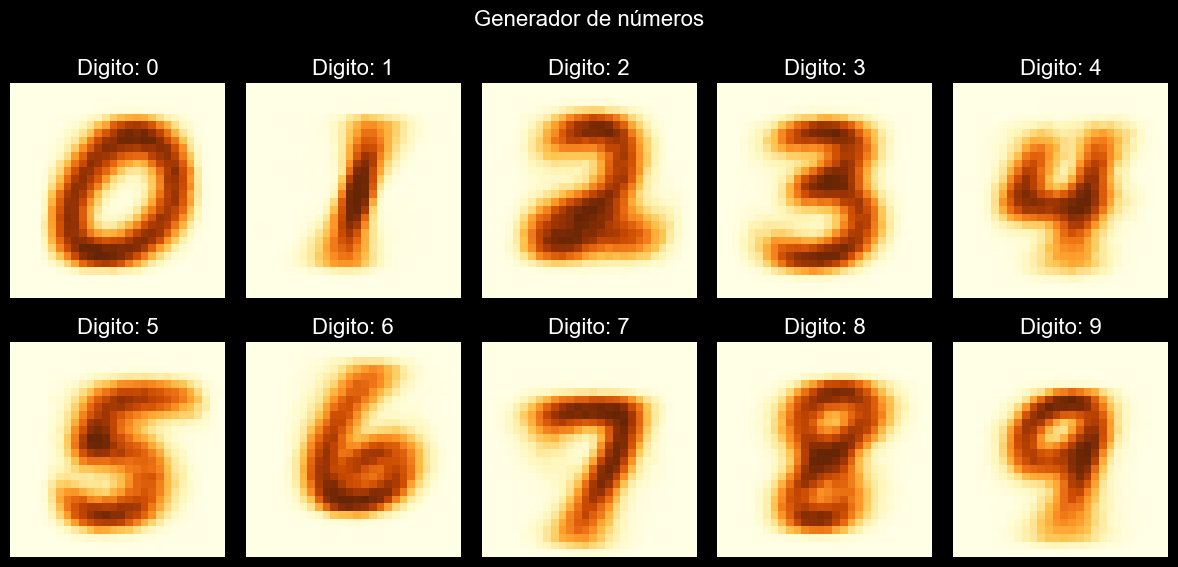

In [78]:
plt.style.use('dark_background')
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
probability = np.exp(model2.feature_log_prob_)
labels = list(range(10))

for i, ax in enumerate(axs.flatten()):


    vec_generated_total = pd.DataFrame()
    for j in range(1000):
        vec_generated = np.random.binomial(1, probability[i])
        vec_generated_total[j] = vec_generated
    vec_generated_total = vec_generated_total.mean(axis = 1)
    
    img = np.array(vec_generated_total).reshape((28, 28))

    ax.imshow(img, cmap="YlOrBr")

    # Configurar título y etiquetas de ejes
    ax.set_title(f"Digito: {labels[i]}")
    ax.axis("off")  # Ocultar los ejes


plt.suptitle("Generador de números", fontsize=16)
plt.tight_layout()
